####STRUCTURE & FUNCTION OF DNA
Deoxyribose Nucleic Acid (DNA) is the basic form of life. DNA carries the genetic information of every living
organism, and it can be transferred from one organism to another.  

Structurally, DNA is a polymer that is synthesized by a protein called DNA Polymerase.  It is composed of long
chains of nucleotides, each containing a sugar molecule called deoxyribose, a phosphate group, and a
nitrogenous base. DNA strands pair to form a double-stranded, twisted helix, held together by hydrogen bonds
between complementary nitrogenous bases. The nitrogenous bases strictly pair as;

Adenine (A) <-> Thymine (T) and
Cytosine (C) <-> Guanine (G)

DNA’s primary role is in protein synthesis, carried out through two main processes: transcription and translation.
In transcription, DNA is transcribed into RNA, which is then translated into proteins—a process known as the
central dogma of molecular biology. The sequence of DNA bases determines the proteins that will be
synthesized.

Another key function of DNA is the storage of genetic information. This allows for the transfer of hereditary traits
from parents to offsprings. Although DNA facilitates genetic transfer, everyone’s DNA and DNA sequence is
unique, contributing to genetic diversity within and across species.

####DNA SEQUENCING & SEQUENCING MUTATIONS

DNA sequencing refers to the process of determining the specific order of nucleotide bases (A, T, C, and G) along
a DNA strand.  

DNA sequencing is crucial for genome analysis and the understanding of biological processes in cells. Next
Generation Sequencing (NGS) is a fast and low-cost sequencing option that has revolutionized DNA sequencing.
It is widely used for cost effective disease screening, enabling personalized medicine by tailoring treatments
targeting particular genomes.  

DNA sequencing often reveals mutations, which may arise from DNA synthesis errors, sequencing inaccuracies,
or because of disease. The three main types of mutations analyzed in DNA sequences are mismatches, insertions,
and deletions:

**Insertion errors** occur where an extra nucleotide base pair is erroneously added
to a DNA sequence while
**deletion errors** occur where a nucleotide base pair is erroneously removed from a DNA sequence.

**Mismatch errors** occur when two two non-complementary bases pair incorrectly, such as Adenine (A) pairing
with Guanine (G) or Cytosine (C) pairing with Thymine (T). These errors can be identified during analysis by
calculating the Hamming distance between two DNA sequences. The Hamming distance measures the number
of positions at which corresponding bases differ between two DNA strands, highlighting potential mismatches.

Install biopython package & import necessary modules


In [9]:
!pip install biopython

In [10]:
#import relevant modules
from Bio import SeqIO
import matplotlib.pyplot as plt

In [11]:
#Define file path
file_path = "/content/exploringgeneticdiversityusingpythondataset.fastq"

###Calculating & Plotting Hamming Distance


Define template sequences and the index sequence differentiating group 1 and group 2

In [12]:
#define our known template sequences
template1 = "ATCGATCGATAGCTAGCTTT"
template2 = "TAGCTAGCTAGCTATATTAG"

#define group 1 and group 2 indexes
index1 = "ATGCTA"
index2 = "CGATAG"

Define function to calculate the Hamming Distance. If statement added to return an error if any of the sequences are not equal in size

In [13]:
# function for calculating hamming distance
def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of the same length")
    return sum(el1 != el2 for el1, el2 in zip(seq1, seq2))

Initialize storage for each of the 2 groups defined and their respective hamming distances

In [14]:
# Initialize storage for each group
group1 = []
group2 = []

#initiatialie storage for the hamming distances of each group
hammingdistance_group1 = []
hammingdistance_group2 = []

Read the Fastq file and classify sequences in the file as group 1 or 2 depending on the index attached to it

In [15]:
# Read the FASTQ file and classify sequences
with open(file_path, "r") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        sequence = str(record.seq)
        if sequence.endswith(index1):
            group1.append(sequence)
        elif sequence.endswith(index2):
            group2.append(sequence)

Calculate the Hamming distances for both group 1 and 2. Perform demultiplexing to remove the indexes from each sequence

In [16]:
# Calculate Hamming distances for group 1
for seq in group1:
    trimmed_seq = seq[0:-6]  # Remove the index part
    distance = hamming_distance(trimmed_seq, template1)
    hammingdistance_group1.append(distance)

# Calculate Hamming distances for group 2
for seq in group2:
    trimmed_seq = seq[0:-len(index2)]  # Remove the index part
    distance = hamming_distance(trimmed_seq, template2)
    hammingdistance_group2.append(distance)

Print out the hamming distances of all sequences in group 1 for confirmation


In [17]:
for ham_dist in hammingdistance_group1:
  print(ham_dist)

1
5
2
5
3
2
4
5
5
1
2
2
1
4
1
4
3
1
4
2
3
4
4
5
1
4
3
5
1
3
1
1
2
1
3
1
5
4
1
2
5
5
3
5
4
3
1
1
5
2


Plot the distribution of hamming distances using matplotlib package


Text(0.5, 0, 'Sequence ID  for group 2')

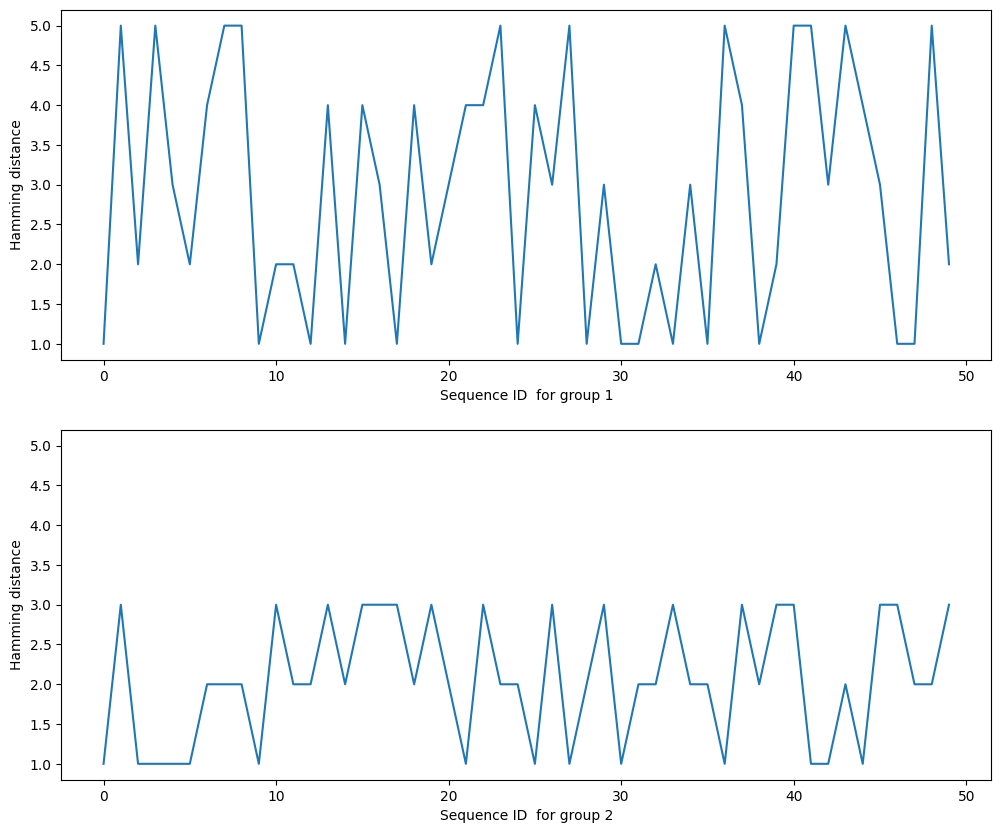

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharey=True)
ax[0].plot(hammingdistance_group1)
ax[1].plot(hammingdistance_group2)
ax[0].set_ylabel('Hamming distance')
ax[0].set_xlabel('Sequence ID  for group 1')

ax[1].set_ylabel('Hamming distance')
ax[1].set_xlabel('Sequence ID  for group 2')

###Checking for Quality Scores

Initialize storage for the quality scores of group 1 and group 2

In [19]:
#initialize storage for quality scores for each group
qualityscore_group1 = []
qualityscore_group2 = []

Read FASTQ file and group sequences based on indices at the end of the sequence.Also exclude the index from the sequence to check for quality score

In [20]:
# Read the FASTQ file and separate based on index
with open(file_path, "r") as fastq_file:
    for record in SeqIO.parse(fastq_file, "fastq"):
        # Extract the sequence and its quality scores
        sequence_with_index = record.seq
        quality_scores = record.letter_annotations["phred_quality"]

        # Check the index at the end of the sequence
        if sequence_with_index.endswith("ATGCTA"):
            # Store the quality scores for Group 1 (index 1)
            qualityscore_group1.append(quality_scores[:-6])  # Exclude the index length from quality
        elif sequence_with_index.endswith("CGATAG"):
            # Store the quality scores for Group 2 (index 2)
            qualityscore_group2.append(quality_scores[:-6])  # Exclude the index length from quality

Flatten the lists to get quality scores across all reads

In [21]:
quality_group_1_flat = []
for sublist in qualityscore_group1:
    for score in sublist:
        quality_group_1_flat.append(score)
quality_group_2_flat = []
for sublist in qualityscore_group2:
    for score in sublist:
        quality_group_2_flat.append(score)

Plot the base call quality for each quality score group


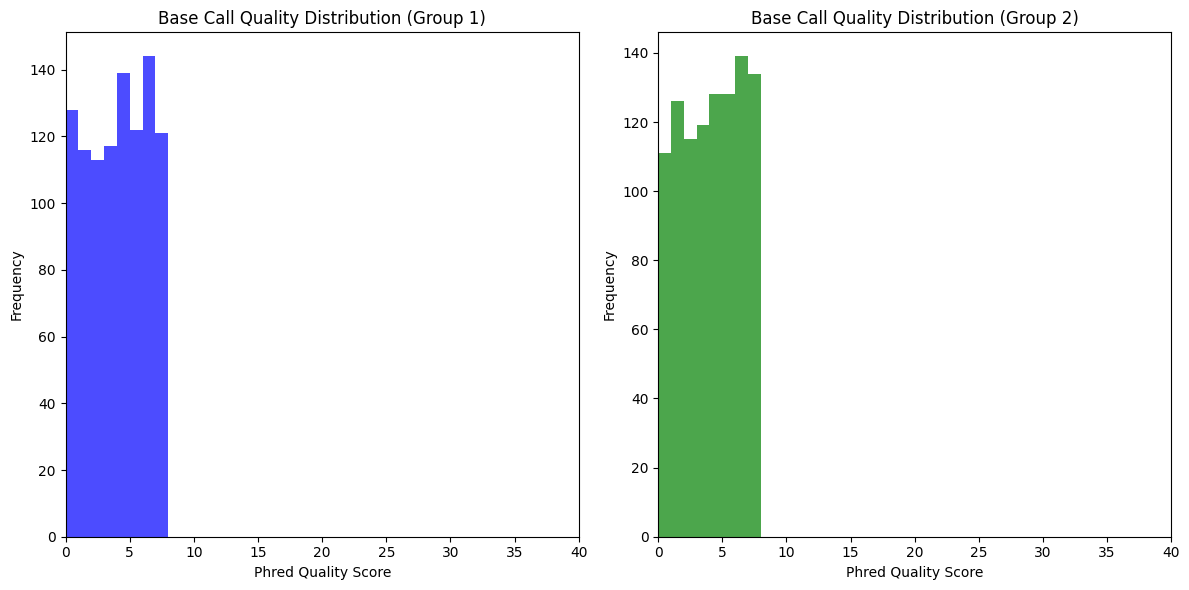

In [22]:
plt.figure(figsize=(12, 6))

# Plot for Group 1
plt.subplot(1, 2, 1)
plt.hist(quality_group_1_flat, bins=range(0, 42), color='blue', alpha=0.7)
plt.title("Base Call Quality Distribution (Group 1)")
plt.xlabel("Phred Quality Score")
plt.ylabel("Frequency")
plt.xlim(0, 40)

# Plot for Group 2
plt.subplot(1, 2, 2)
plt.hist(quality_group_2_flat, bins=range(0, 42), color='green', alpha=0.7)
plt.title("Base Call Quality Distribution (Group 2)")
plt.xlabel("Phred Quality Score")
plt.ylabel("Frequency")
plt.xlim(0, 40)

plt.tight_layout()
plt.show()
